In [1]:
# ----------------------------------
# DAY 8: STATISTICS FOR DATA SCIENCE
# ----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("📈 Day 8: Statistics for Data Science 📈\n")

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Basic cleaning
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


📈 Day 8: Statistics for Data Science 📈



/tmp/ipython-input-2307464911.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2307464911.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Mean, Median, Mode

In [2]:
print("== Mean, Median, Mode for Age ==")

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)


== Mean, Median, Mode for Age ==
Mean Age: 29.69911764705882
Median Age: 29.69911764705882
Mode Age: 29.69911764705882


Variance & Standard Deviation

In [3]:
print("\n== Variance & Standard Deviation for Age ==")

variance_age = df['Age'].var()
std_age = df['Age'].std()

print("Variance:", variance_age)
print("Standard Deviation:", std_age)



== Variance & Standard Deviation for Age ==
Variance: 169.05239993721085
Standard Deviation: 13.002015226002884


Meaning:

Variance → spread of data

Standard deviation → how far values are from the mean

Distribution Visualization

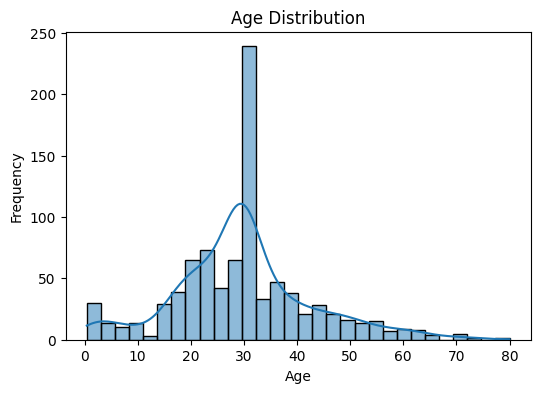

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Quartiles & IQR (Outlier Detection)

In [5]:
Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.50)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

print("Q1:", Q1)
print("Median (Q2):", Q2)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 22.0
Median (Q2): 29.69911764705882
Q3: 35.0
IQR: 13.0


Outlier Detection

In [6]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of outliers in Age:", outliers.shape[0])


Lower Bound: 2.5
Upper Bound: 54.5
Number of outliers in Age: 66


Probability Basics

In [7]:
prob_survival = df['Survived'].mean()
print("Probability of Survival:", prob_survival)


Probability of Survival: 0.3838383838383838


Conditional Probability

In [8]:
female_survival_prob = df[df['Sex'] == 'female']['Survived'].mean()
print("P(Survived | Female):", female_survival_prob)


P(Survived | Female): 0.7420382165605095


In [9]:
first_class_survival_prob = df[df['Pclass'] == 1]['Survived'].mean()
print("P(Survived | Pclass = 1):", first_class_survival_prob)


P(Survived | Pclass = 1): 0.6296296296296297


Compare Distributions: Survived vs Not Survived

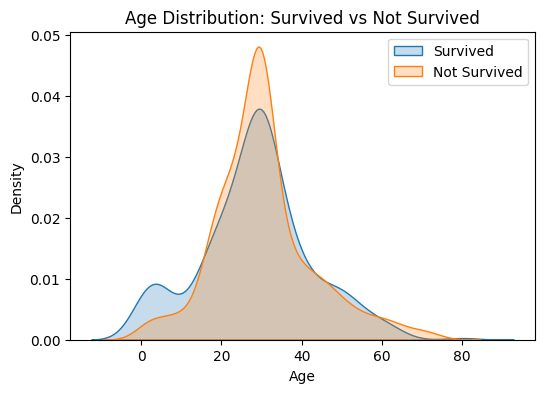

In [10]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', fill=True)
plt.title("Age Distribution: Survived vs Not Survived")
plt.xlabel("Age")
plt.legend()
plt.show()


Mini Exercises (Do in Code)

In [11]:
print("\n== Mini Exercises ==")

# 1. Mean Fare
print("Mean Fare:", df['Fare'].mean())

# 2. Probability passenger is from Southampton
print("P(Embarked = S):", (df['Embarked'] == 'S').mean())

# 3. Probability passenger survived and was female
p_survived_and_female = len(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]) / len(df)
print("P(Survived and Female):", p_survived_and_female)

# 4. Probability passenger survived given FamilySize > 3
p_survival_large_family = df[df['FamilySize'] > 3]['Survived'].mean()
print("P(Survived | FamilySize > 3):", p_survival_large_family)



== Mini Exercises ==
Mean Fare: 32.204207968574636
P(Embarked = S): 0.7250280583613917
P(Survived and Female): 0.2615039281705948
P(Survived | FamilySize > 3): 0.34065934065934067
